In [21]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [36]:
# Load dataset
df = pd.read_csv("./mpg_raw.csv")

# Basic dataset overview
# print(df.head())  # First 5 rows
# print(df.tail())  # Last 5 rows
# print(df.sample(5))  # Random 5 rows
# print("Shape of dataset:", df.shape)  # Dimensions of dataset
print(df.info())  # Column details
# print(df.describe())  # Summary statistics
# print(df.dtypes)  # Data types of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None


In [23]:
# Missing values analysis
print("\nMissing values per column:")
print(df.isna().sum())
print(df.isnull().sum())



Missing values per column:
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64


In [24]:
# Handling missing values
df.dropna(inplace=True)  # Drop rows with NaN values

In [25]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

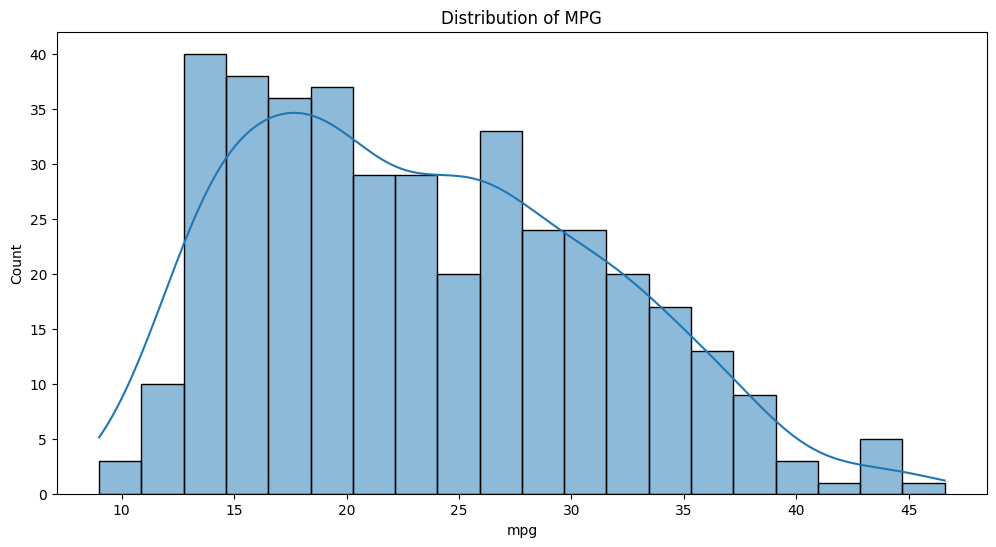

In [26]:
# Univariate Data Analysis
plt.figure(figsize=(12, 6))
sns.histplot(df['mpg'], kde=True, bins=20)
plt.title('Distribution of MPG')
plt.show()

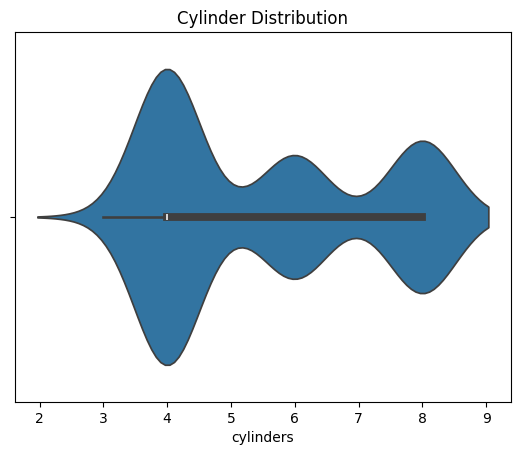

In [16]:

sns.violinplot(x=df['cylinders'])
plt.title('Cylinder Distribution')
plt.show()

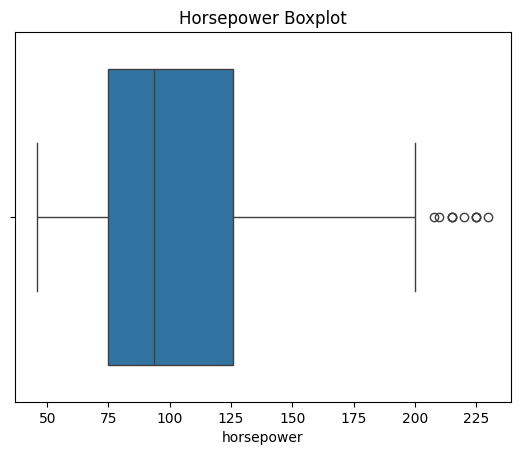

In [17]:
sns.boxplot(x=df['horsepower'])
plt.title('Horsepower Boxplot')
plt.show()

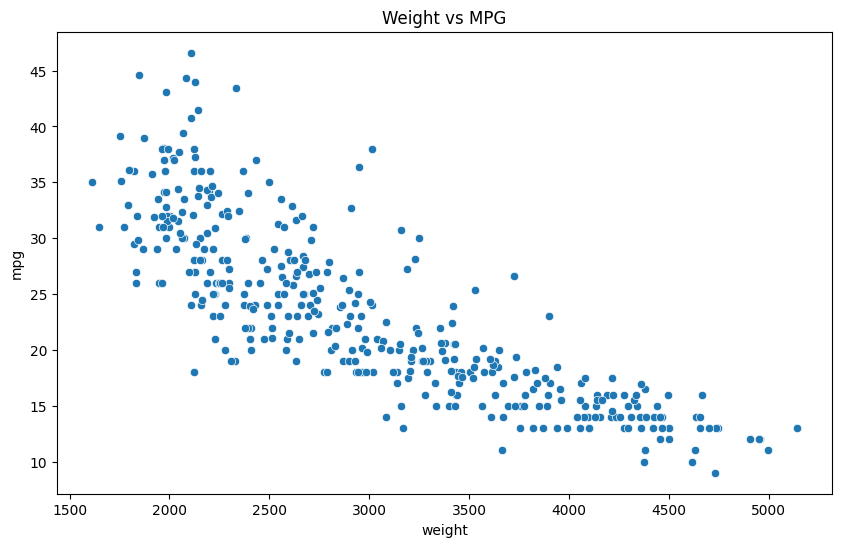

In [18]:
# Bivariate Data Analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['weight'], y=df['mpg'])
plt.title('Weight vs MPG')
plt.show()

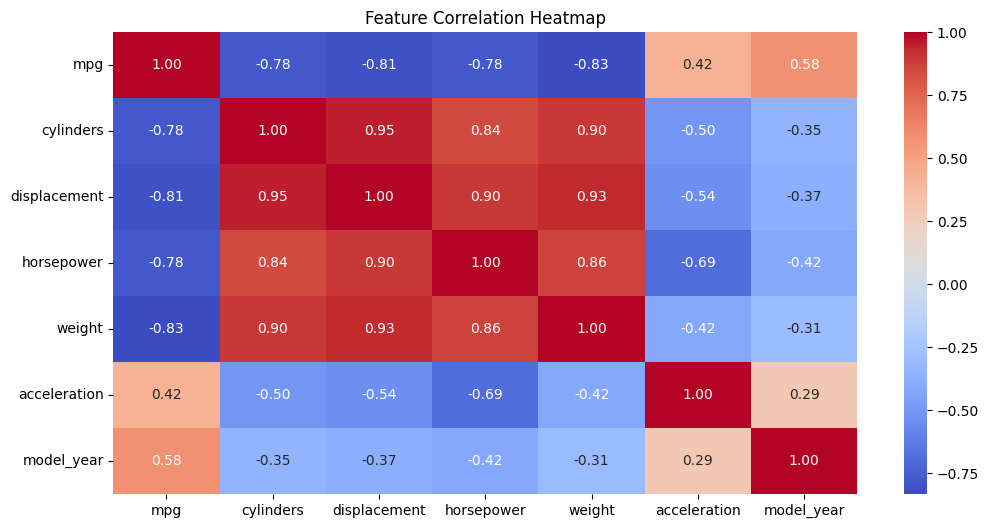

In [32]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.select_dtypes(exclude=['object']).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

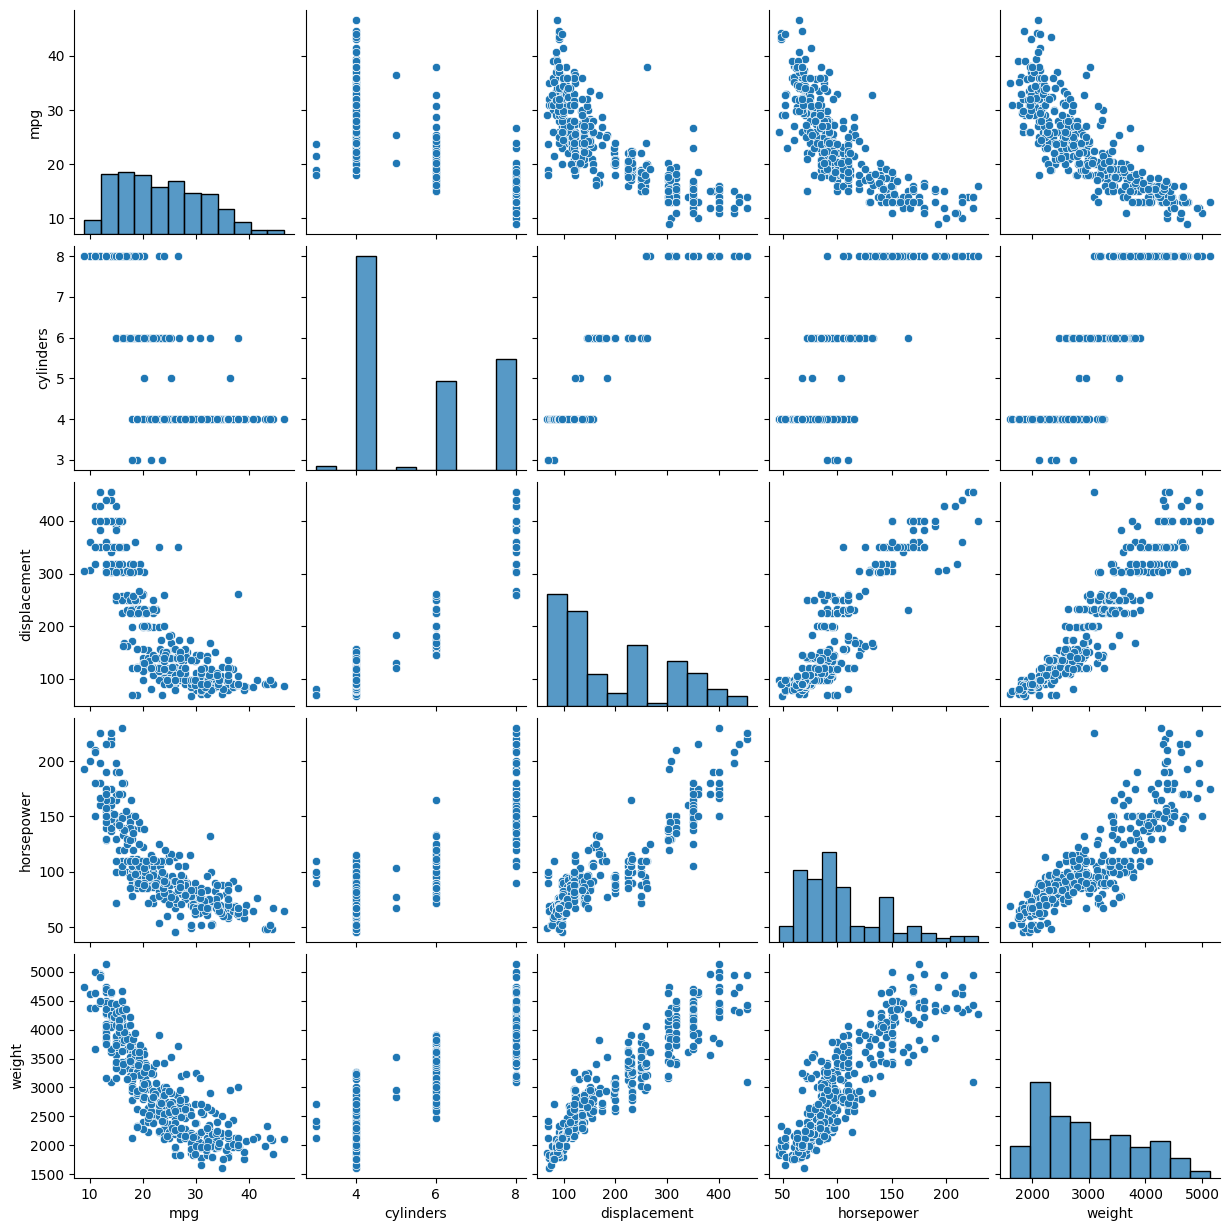

In [28]:
# Additional plots
sns.pairplot(df[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight']])
plt.show()


In [34]:
# Standardizing continuous variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
continuous_vars = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']
df[continuous_vars] = scaler.fit_transform(df[continuous_vars])

In [35]:
# Standardizing continuous variables using z-score from scipy
from scipy.stats import zscore
continuous_vars = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']
df[continuous_vars] = df[continuous_vars].apply(zscore)